Terceiro projeto de Inteligência artificial

Alunos: Lucas Garavaglia, Milena Santos

Link: https://archive.ics.uci.edu/ml/datasets/Early+stage+diabetes+risk+prediction+dataset.

## imports necessários

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import scikit_posthocs as sp
from scipy import stats

#### Carregamento do Dataset

In [2]:
init_dataset = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00529/diabetes_data_upload.csv")
# dataset.info()
dataset = init_dataset.copy()

Identificação de outliers

#### Pré processamento

#### Foi necessário a conversão dos dados para boolean poís a biblioteca não aceita tipo str

In [3]:
dataset['class'] = [1 if x == 'Positive' else 0 for x in dataset['class']]
dataset['Gender'] = [1 if x == 'Male' else 0 for x in dataset['Gender']]
dataset['Polyuria'] = [1 if x == 'Yes' else 0 for x in dataset['Polyuria']]
dataset['Polydipsia'] = [1 if x == 'Yes' else 0 for x in dataset['Polydipsia']]
dataset['weakness'] = [1 if x == 'Yes' else 0 for x in dataset['weakness']]
dataset['Polyphagia'] = [1 if x == 'Yes' else 0 for x in dataset['Polyphagia']]
dataset['Itching'] = [1 if x == 'Yes' else 0 for x in dataset['Itching']]
dataset['Irritability'] = [1 if x == 'Yes' else 0 for x in dataset['Irritability']]
dataset['Alopecia'] = [1 if x == 'Yes' else 0 for x in dataset['Alopecia']]
dataset['Obesity'] = [1 if x == 'Yes' else 0 for x in dataset['Obesity']]
dataset['delayed healing'] = [1 if x == 'Yes' else 0 for x in dataset['delayed healing']]
dataset['partial paresis'] = [1 if x == 'Yes' else 0 for x in dataset['partial paresis']]
dataset['muscle stiffness'] = [1 if x == 'Yes' else 0 for x in dataset['muscle stiffness']]
dataset['Genital thrush'] = [1 if x == 'Yes' else 0 for x in dataset['Genital thrush']]
dataset['visual blurring'] = [1 if x == 'Yes' else 0 for x in dataset['visual blurring']]
dataset['sudden weight loss'] = [1 if x == 'Yes' else 0 for x in dataset['sudden weight loss']]

cv_dataset = dataset.copy()

<AxesSubplot:xlabel='Age'>

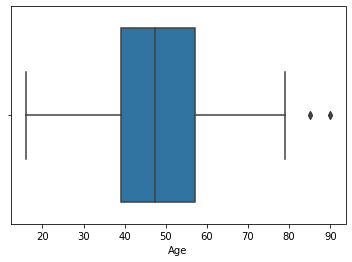

In [4]:
sns.boxplot(x=init_dataset['Age'])

Remoção de valores faltantes e dados duplicados.

In [5]:
dataset = dataset.dropna() #Fazendo uma observação do dataset foi notado que não 
                                #existem valores nulos, portanto esse método não esta fazendo nada.
                        
# dataset = dataset.drop_duplicates() 
#Após a remoção dos valores duplicados foi notado que a acurácia dos modelos cairam,
#plotando um gráfico de proporção foi notado também que os dados estão desbalanceados,
#portanto fio optado por não remover os duplicados a fim de manter o dataset balanceado.

indxs = []
for index,x in enumerate(dataset['Age']):
    if(x < 20 or x > 65):
        indxs.append(index)
        
dataset.drop(indxs,axis=0,inplace=True)

dataset.reset_index(inplace=True, drop=True)

<AxesSubplot:xlabel='Age'>

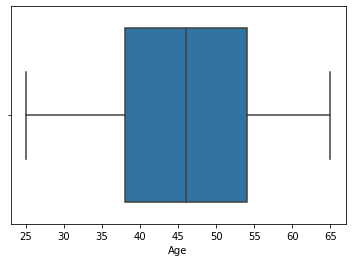

In [6]:
sns.boxplot(x=dataset['Age'])

In [7]:
def proportionDataset(dataset):
    target_count = dataset["class"].value_counts()
    t1 = str(round(target_count[1]*100/len(dataset),1)) + "%"
    t2 = str(round(target_count[0]*100/len(dataset),1)) + "%"
    print('Class 0:', target_count[0])
    print('Class 1:', target_count[1])
    print('Proporção:', round(target_count[1] / target_count[0], 2), ': 1')
    plt.bar([t1, t2], target_count,color = ['#1F77B4', '#FF7F0E'])
    # target_count.plot(kind='bar', title='Count (target)',color = ['#1F77B4', '#FF7F0E']);


Class 0: 184
Class 1: 284
Proporção: 1.54 : 1


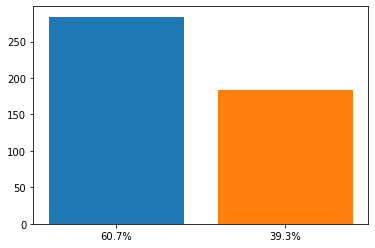

In [8]:
proportionDataset(dataset)
# proportionDataset(init_dataset)

In [9]:
def confusionMatrix(y_test,y_pred):
    cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
    print('Confusion matrix:\n', cm)
    return cm

def showConfusionMatrix(y_test,y_pred):
    conf_mat = confusionMatrix(y_test,y_pred)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
    fig.colorbar(cax)
    plt.xlabel('Predicted')
    plt.ylabel('Expected')
    plt.show()

In [10]:
def treeDecision(X_train, y_train):
    """
    Função que cria um árvore de decisão e retorna o modelo treinado.
    """
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)
    return model

In [11]:
def RForestDecision(X_train,  y_train):
    """
    Função que cria um classificador Random Florest e retorna o modelo treinado.
    """
    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    return model

In [12]:
def KNN(X_train,  y_train):
    """
    Função que cria um classificador knn e retorna o modelo treinado.
    """
    model = KNeighborsClassifier()
    model.fit(X_train, y_train)
    return model

Separação dos dados para treino e test

In [13]:
X_train, X_test, y_train, y_test = train_test_split(dataset.drop(["class"], axis=1), dataset["class"], test_size=0.3)

#### seleção de atributos

In [14]:
clf = DecisionTreeClassifier(max_leaf_nodes=10)
feature_selection = RFE(clf, step=1)
fs = feature_selection.fit(X_train, y_train)

attributes_selected = []
for index,i in enumerate(dataset.columns.drop(["class"])):
    if(fs.support_[index] == False):
        attributes_selected.append(i)

dataset_selected_attributes = dataset.drop(attributes_selected, axis=1).copy()

In [87]:
for inde,i in enumerate(dataset.columns):
    print('Selected %s, Rank: %.3f \tColumn: %s' % ( fs.support_[inde], fs.ranking_[inde],dataset.columns[inde]))


Selected True, Rank: 1.000 	Column: Age
Selected True, Rank: 1.000 	Column: Gender
Selected True, Rank: 1.000 	Column: Polyuria
Selected True, Rank: 1.000 	Column: Polydipsia
Selected False, Rank: 9.000 	Column: sudden weight loss
Selected False, Rank: 8.000 	Column: weakness
Selected False, Rank: 7.000 	Column: Polyphagia
Selected True, Rank: 1.000 	Column: Genital thrush
Selected False, Rank: 6.000 	Column: visual blurring
Selected False, Rank: 5.000 	Column: Itching
Selected True, Rank: 1.000 	Column: Irritability
Selected False, Rank: 4.000 	Column: delayed healing
Selected False, Rank: 3.000 	Column: partial paresis
Selected True, Rank: 1.000 	Column: muscle stiffness
Selected True, Rank: 1.000 	Column: Alopecia
Selected False, Rank: 2.000 	Column: Obesity


IndexError: index 16 is out of bounds for axis 0 with size 16

In [15]:
X_train_select_attr, X_test_select_attr, y_train_select_attr, y_test_select_attr = train_test_split(dataset_selected_attributes.drop(["class"], axis=1), dataset_selected_attributes["class"], test_size=0.3)
X_train_no_pre_pros, X_test_no_pre_pros, y_train_no_pre_pros, y_test_no_pre_pros = train_test_split(cv_dataset.drop(["class"], axis=1), cv_dataset["class"], test_size=0.3)

In [16]:
model_TD  = treeDecision(X_train, y_train)
model_RF  = RForestDecision(X_train, y_train)
model_KNN = KNN(X_train, y_train)

In [17]:
model_TD_select_attr  = treeDecision(X_train_select_attr, y_train_select_attr)
model_RF_select_attr  = RForestDecision(X_train_select_attr, y_train_select_attr)
model_KNN_select_attr = KNN(X_train_select_attr, y_train_select_attr)

In [18]:
model_TD_no_pre_pros  = treeDecision(X_train_no_pre_pros, y_train_no_pre_pros)
model_RF_no_pre_pros  = RForestDecision(X_train_no_pre_pros, y_train_no_pre_pros)
model_KNN_no_pre_pros = KNN(X_train_no_pre_pros, y_train_no_pre_pros)

In [41]:
TD_acc_select_attr = cross_val_score(model_TD_select_attr, X_test_select_attr, y_test_select_attr, cv=10,scoring="f1")
TD_acc = cross_val_score(model_TD, X_test, y_test, cv=10,scoring="f1")
TD_acc_no_pre_pros = cross_val_score(model_TD_no_pre_pros, X_test_no_pre_pros, y_test_no_pre_pros, cv=10,scoring="f1")

print("Média de acurácia: {}".format(TD_acc_select_attr.mean()))
print("Média de acurácia: {}".format(TD_acc.mean()))
print("Média de acurácia: {}".format(TD_acc_no_pre_pros.mean()))

Média de acurácia: 0.970239770549368
Média de acurácia: 0.9278250773993808
Média de acurácia: 0.8848319327731092


In [43]:
RF_acc_select_attr = cross_val_score(model_RF_select_attr, X_test_select_attr, y_test_select_attr, cv=10,scoring="f1")
RF_acc = cross_val_score(model_RF, X_test, y_test, cv=10,scoring="f1")
RF_acc_no_pre_pros = cross_val_score(model_RF_no_pre_pros, X_test_no_pre_pros, y_test_no_pre_pros, cv=10,scoring="f1")

print("Média de acurácia: {}".format(RF_acc_select_attr.mean()))
print("Média de acurácia: {}".format(RF_acc.mean()))
print("Média de acurácia: {}".format(RF_acc_no_pre_pros.mean()))

Média de acurácia: 0.9597385174165358
Média de acurácia: 0.9541322669418644
Média de acurácia: 0.9447222222222222


In [46]:
knn_acc_select_attr = cross_val_score(model_KNN_select_attr, X_test_select_attr, y_test_select_attr, cv=10,scoring="f1")
knn_acc = cross_val_score(model_KNN, X_test, y_test, cv=10,scoring="f1")
knn_acc_no_pre_pros = cross_val_score(model_KNN_no_pre_pros, X_test_no_pre_pros, y_test_no_pre_pros, cv=10,scoring="f1")

print("Média de acurácia: {}".format(knn_acc_select_attr.mean()))
print("Média de acurácia: {}".format(knn_acc.mean()))
print("Média de acurácia: {}".format(knn_acc_no_pre_pros.mean()))

Média de acurácia: 0.8441777450873561
Média de acurácia: 0.8191731780431472
Média de acurácia: 0.7899418228829994


In [70]:
print("Comparação entre os classificadores:")
print("Algoritmo\t\tF1-Score")
print("----------------------------------------------------")
print("%s:\t\t\t%.2f" % ("KNN", knn_acc_select_attr.mean()))
print("%s:\t\t%.2f" % ("Random Florest", RF_acc_select_attr.mean()))
print("%s:\t\t%.2f" % ("Decision Tree", TD_acc_select_attr.mean()))

print("\n\nComparação entre os datasets utilizando KNN:")
print("F1-Score\tDescrição")
print("----------------------------------------------------")
print("%.2f\t\t%s" % (knn_acc_select_attr.mean(),"Dataset com atributos selecionados."))
print("%.2f\t\t%s" % (knn_acc.mean(),"Dataset com pré-processamento sem atributos selecionados."))
print("%.2f\t\t%s" % (knn_acc_no_pre_pros.mean(),"Dataset sem pre-processamento."))

print("\n\nComparação entre os datasets utilizando random florest:")
print("F1-Score\tDescrição")
print("----------------------------------------------------")
print("%.2f\t\t%s" % (RF_acc_select_attr.mean(),"Dataset com atributos selecionados."))
print("%.2f\t\t%s" % (RF_acc.mean(),"Dataset com pré-processamento sem atributos selecionados."))
print("%.2f\t\t%s" % (RF_acc_no_pre_pros.mean(),"Dataset sem pre-processamento."))

print("\n\nComparação entre os datasets utilizando decision tree:")
print("F1-Score\tDescrição")
print("----------------------------------------------------")
print("%.2f\t\t%s" % (TD_acc_select_attr.mean(),"Dataset com atributos selecionados."))
print("%.2f\t\t%s" % (TD_acc.mean() ,"Dataset com pré-processamento sem atributos selecionados."))
print("%.2f\t\t%s" % (TD_acc_no_pre_pros.mean(),"Dataset sem pre-processamento."))

Comparação entre os classificadores:
Algoritmo		F1-Score
----------------------------------------------------
KNN:			0.84
Random Florest:		0.96
Decision Tree:		0.97


Comparação entre os datasets utilizando KNN:
F1-Score	Descrição
----------------------------------------------------
0.84		Dataset com atributos selecionados.
0.82		Dataset com pré-processamento sem atributos selecionados.
0.79		Dataset sem pre-processamento.


Comparação entre os datasets utilizando random florest:
F1-Score	Descrição
----------------------------------------------------
0.96		Dataset com atributos selecionados.
0.95		Dataset com pré-processamento sem atributos selecionados.
0.94		Dataset sem pre-processamento.


Comparação entre os datasets utilizando decision tree:
F1-Score	Descrição
----------------------------------------------------
0.97		Dataset com atributos selecionados.
0.93		Dataset com pré-processamento sem atributos selecionados.
0.88		Dataset sem pre-processamento.


In [61]:
stats.friedmanchisquare(knn_acc_select_attr, RF_acc_select_attr, TD_acc_select_attr)

FriedmanchisquareResult(statistic=15.749999999999993, pvalue=0.00038012895786946504)

h0 = não existe diferença estatistica significativa

h1 = pelo menos uma média tem diferença significativa

se pvalue < 0.05 h0 rejeitada

se não h0 aceita

In [62]:
sp.posthoc_nemenyi_friedman(np.array([knn_acc_select_attr, RF_acc_select_attr, TD_acc_select_attr]).T)

,0,1,2
0,1.000000,0.019949,0.002297
1,0.019949,1.000000,0.759769
2,0.002297,0.759769,1.000000


knn vs random florest = 0.019  Analisando o f1-score o random florest é melhor

knn vs decision tree = 0.002 Analisando o f1-score a decision tree é melhor

ramdon florest vs decisino tree = 0.75  sem diferença significativa